# 학군이 좋으면, 부동산 가격이 높다. 

## 가설
학군이 좋으면, 부동산 매매 가격이 상대적으로 높을 것이다. 

## 정의(def)

* 학군이란?
    * 중학교에서 특수목적고로 진학하는 비율
* 부동산 매매 가격?
    * 아파트 거래 가격
    
## 결과
* 학군과 부동산 가격은 비례하진 않지만 경향성을 보인다.

# 1. 데이터 가져오기

In [1]:
# 1. 원본데이터
import pandas as pd

In [2]:
graduate_path=f'data/part1_2018년_2차_졸업생의_진로_현황(전체).xlsx'

In [3]:
raw_graduate=pd.read_excel(graduate_path,sheet_name='2018_졸업생의 진로 현황(중)')

# 2. 전처리

## 2-1. 원본데이터에서 필요한 데이터만 추출

In [4]:
# 2-1. 전처리, 필요한 데이터 추출
# 전처리는 데이터를 분석하기 전에 필요한 데이터를 수집하고, 보정하는 행위
# 전처리에 {누락데이터}를 처리하는 것이 대부분 + 수치화(항목, 속성, 목록...)
#'지역', '학교명', ''
select_col = raw_graduate[['지역', '학교명','정보공시 \n 학교코드', '졸업자.2', '(특수목적고)과학고 진학자.2','(특수목적고)외고ㆍ국제고 진학자.2']]

In [5]:
select_col.columns = ['지역', '학교명', '학교코드', '졸업자', '과고', '외고']

In [6]:
graduate_data = select_col.drop(0)

## 2-2. 수치화

In [7]:
# 누락데이터 검색방법
# 1) 졸업자 컬럼의 행을 하나씩 읽어와서 숫자(type)이 아니면 0으로 변경한다. 
# 2) 졸업자 컬럼의 행을 하나씩 읽어와서 숫자가 있는 행만 불러옴
# 3) 숫자로 변경해 주는 기능이 있는가?

# 2-2. 수치화(실수)
graduate_data['졸업자']=pd.to_numeric(graduate_data['졸업자'])
graduate_data['과고']=pd.to_numeric(graduate_data['과고'])
graduate_data['외고']=pd.to_numeric(graduate_data['외고'])
# 컬럼 추가 easy~~~
graduate_data['총합']=graduate_data['과고']+graduate_data['외고']

graduate_data

,지역,학교명,학교코드,졸업자,과고,외고,총합
1,서울특별시 성북구,서울대학교사범대학부설중학교,S000003514,234.0,4.0,5.0,9.0
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,S000003562,172.0,0.0,8.0,8.0
3,서울특별시 강남구,개원중학교,S010000698,214.0,2.0,9.0,11.0
4,서울특별시 서초구,경원중학교,S010000700,310.0,5.0,4.0,9.0
5,서울특별시 강남구,구룡중학교,S010000701,256.0,3.0,4.0,7.0
...,...,...,...,...,...,...,...
3454,제주특별자치도 제주시,탐라중학교,S170000844,298.0,1.0,1.0,2.0
3455,제주특별자치도 제주시,제주영지학교,S170000512,12.0,0.0,0.0,0.0
3456,제주특별자치도 제주시,제주영송학교,S170000513,21.0,0.0,0.0,0.0
3457,제주특별자치도 서귀포시,서귀포온성학교,S170000790,9.0,0.0,0.0,0.0


In [8]:
# 지역을 시도, 구군으로 구체적으로 나눠보자!!

# [지역] 컬럼 기준으로 데이터를 읽어야함
# ex) temp = "서울특별시 성북구"
# 공백 기준으로 문자열을 나누기

  ##앞에 덩어리만 갖고와서 그 덩어리의 길이가 4개라면 첫번째, 3번째글자만 갖고와서 붙여줌
# '서울특별시'를 index = 0, 성북구를 index = 1로 치환 ==> 시도, 구군

In [9]:
# 지역을 시도, 구군으로 구체적으로 나눠보자!!
# 입력은 '서울특별시 성북구'
# 처리
# 1) 서울특별시, 성북구로 나누기 (공백으로)
# 2) 서울특별시가 있을때, 서울만 분리하기
# 출력은 서울

In [10]:
def get_province(x):
    temp =x.split(' ')
    sido=temp[0]

    if len(sido)!=4 :
        return (sido[:2])
    else:
        return (sido[0]+sido[2])

In [11]:
province1="서울특별시 성북구"
province2="경상북도 성북구"
province3="경상남도 성북구"

get_province(province1)

'서울'

In [12]:
graduate_data['지역'].dropna().apply(get_province)

1       서울
2       서울
3       서울
4       서울
5       서울
        ..
3454    제주
3455    제주
3456    제주
3457    제주
3458    제주
Name: 지역, Length: 3456, dtype: object

In [13]:
# 람다 : 익명함수(이름이 없는 함수)
graduate_data['구군'] = graduate_data['지역'].dropna().apply(lambda x: x.split(' ')[1])

In [14]:
def graduate_preprocrssing(path):
    raw_graduate = pd.read_excel(path, sheet_name='2018_졸업생의 진로 현황(중)')
    select_col = raw_graduate[['지역', '학교명','정보공시 \n 학교코드', '졸업자.2', '(특수목적고)과학고 진학자.2','(특수목적고)외고ㆍ국제고 진학자.2']]
    select_col.columns = ['지역', '학교명', '학교코드', '졸업자', '과고', '외고']
    graduate_data = select_col.drop(0)
    graduate_data['과고'] = pd.to_numeric(graduate_data['과고'])
    graduate_data['외고'] =  pd.to_numeric(graduate_data['외고']) 
    graduate_data['졸업자'] =  pd.to_numeric(graduate_data['졸업자']) 
    graduate_data['총합'] = graduate_data['과고'] + graduate_data['외고']
    
    def get_province(x):
        temp = x.split(' ')[0]
        if len(temp) != 4:
            return temp[:2]
        else:
            return temp[0] + temp[2]
    
    graduate_data['시도'] = graduate_data['지역'].dropna().apply(get_province)
    graduate_data['구군'] = graduate_data['지역'].dropna().apply(lambda x: x.split(' ')[1])
    
    graduate_data.at[588,'시도'] = '부산'
    graduate_data.at[588,'구군'] = '기장군'
    graduate_data.at[3011,'시도'] = '경북'
    graduate_data.at[3011,'구군'] = '예천군'
    
    return graduate_data

gradu_df = graduate_preprocrssing(graduate_path)
# gradu_df_path = f'data/part1_2018년_2차_졸업생_정리.csv'
# gradu_df.to_csv(gradu_df_path, mode='w')

In [15]:
gradu_df

,지역,학교명,학교코드,졸업자,과고,외고,총합,시도,구군
1,서울특별시 성북구,서울대학교사범대학부설중학교,S000003514,234.0,4.0,5.0,9.0,서울,성북구
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,S000003562,172.0,0.0,8.0,8.0,서울,종로구
3,서울특별시 강남구,개원중학교,S010000698,214.0,2.0,9.0,11.0,서울,강남구
4,서울특별시 서초구,경원중학교,S010000700,310.0,5.0,4.0,9.0,서울,서초구
5,서울특별시 강남구,구룡중학교,S010000701,256.0,3.0,4.0,7.0,서울,강남구
...,...,...,...,...,...,...,...,...,...
3454,제주특별자치도 제주시,탐라중학교,S170000844,298.0,1.0,1.0,2.0,제주,제주시
3455,제주특별자치도 제주시,제주영지학교,S170000512,12.0,0.0,0.0,0.0,제주,제주시
3456,제주특별자치도 제주시,제주영송학교,S170000513,21.0,0.0,0.0,0.0,제주,제주시
3457,제주특별자치도 서귀포시,서귀포온성학교,S170000790,9.0,0.0,0.0,0.0,제주,서귀포시


In [16]:
gradu_sido = gradu_df.groupby('시도')

In [17]:
gradu_sido

In [18]:
for k, i in gradu_df.groupby('시도'):
    print (k,i)

강원            지역              학교명        학교코드    졸업자   과고   외고   총합  시도   구군
1848  강원도 강릉시          강릉해람중학교  S100000551  238.0  1.0  1.0  2.0  강원  강릉시
1849  강원도 강릉시            강릉중학교  S100000553  247.0  2.0  1.0  3.0  강원  강릉시
1850  강원도 강릉시           하슬라중학교  S100000555  234.0  0.0  2.0  2.0  강원  강릉시
1851  강원도 강릉시            경포중학교  S100000556  169.0  1.0  0.0  1.0  강원  강릉시
1852  강원도 강릉시            관동중학교  S100000557  258.0  3.0  1.0  4.0  강원  강릉시
...       ...              ...         ...    ...  ...  ...  ...  ..  ...
2017  강원도 속초시           속초청해학교  S100003724    5.0  0.0  0.0  0.0  강원  속초시
2018  강원도 홍천군             해밀학교  S100003962    0.0  0.0  0.0  0.0  강원  홍천군
2019  강원도 춘천시  남춘천중학교부설방송통신중학교  S100003917   84.0  0.0  0.0  0.0  강원  춘천시
2020  강원도 원주시   원주중학교부설방송통신중학교  S100003920   89.0  0.0  0.0  0.0  강원  원주시
2021  강원도 강릉시   강릉중학교부설방송통신중학교  S100003921   84.0  0.0  0.0  0.0  강원  강릉시

[174 rows x 9 columns]
경기                지역               학교명        학교코드    졸업자   과고   외고   총합  시도  \
1175 

[141 rows x 9 columns]


In [19]:
gradu_sido=gradu_df.groupby('시도').sum()
gradu_sido.sort_values(by='총합', ascending=False)

,졸업자,과고,외고,총합
시도,,,,
경기,120572.0,361.0,2183.0,2544.0
서울,76687.0,535.0,1449.0,1984.0
부산,27044.0,230.0,767.0,997.0
인천,26046.0,181.0,559.0,740.0
경남,31481.0,195.0,342.0,537.0
대전,14988.0,100.0,261.0,361.0
충북,14831.0,51.0,203.0,254.0
대구,22842.0,98.0,153.0,251.0
울산,10759.0,76.0,165.0,241.0


In [20]:
gradu_sido['진학률'] = gradu_sido['총합'] / gradu_sido['졸업자'] * 100
gradu_sido.sort_values(by='진학률', ascending=False)

,졸업자,과고,외고,총합,진학률
시도,,,,,
부산,27044.0,230.0,767.0,997.0,3.686585
세종,2702.0,18.0,69.0,87.0,3.219837
인천,26046.0,181.0,559.0,740.0,2.841127
서울,76687.0,535.0,1449.0,1984.0,2.587140
대전,14988.0,100.0,261.0,361.0,2.408594
울산,10759.0,76.0,165.0,241.0,2.239985
제주,6487.0,36.0,102.0,138.0,2.127332
경기,120572.0,361.0,2183.0,2544.0,2.109943
충북,14831.0,51.0,203.0,254.0,1.712629


In [21]:
# 부산이 집값이 제일 높아야함!!

In [22]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
# 주피터노트북에 설정하는거임:그래프 그릴거면 inline --> 셀과 셀 사이에 그려주세욤
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
# rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


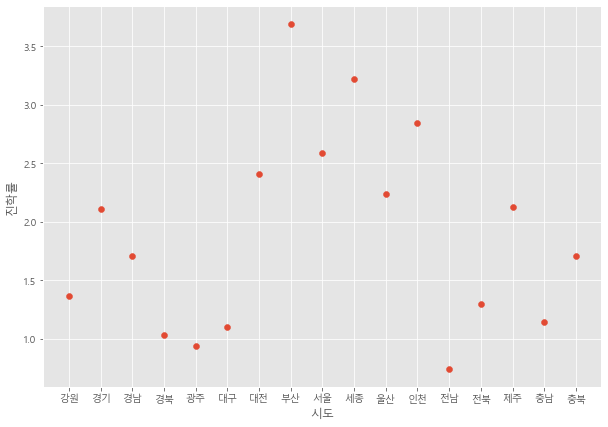

In [23]:
# 5-2. 그래프 그려보기
plt.figure(figsize=(10, 7))
plt.scatter(gradu_sido.index, gradu_sido['진학률'])
plt.xlabel('시도')
plt.ylabel('진학률')        
plt.show()

In [24]:
import pandas as pd

In [25]:
price_path = f'data/part1_평균매매가격_아파트.xlsx'

In [26]:
row_price = pd.read_excel(price_path, skiprows=10)

In [27]:
row_price

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,...,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월
0,전국,NaN,NaN,NaN,264474,264035,263470,262630,261823,260425,...,313552,315961,318503,319757,320248,320271,320157,320135,320944,323915
1,수도권,NaN,NaN,NaN,365249,364275,362790,360918,359253,356737,...,427909,433036,438388,441072,442293,442791,443063,443484,445796,452134
2,지방권,NaN,NaN,NaN,163394,163491,163849,164044,164096,163820,...,205138,204969,204847,204747,204545,204117,203639,203196,202580,202359
3,6대광역시,NaN,NaN,NaN,195186,194989,195093,195037,194851,194273,...,257439,257577,257757,257913,258022,257979,257734,257504,257083,257274
4,5대광역시,NaN,NaN,NaN,190421,190312,190555,190603,190631,190183,...,256837,257017,257173,257333,257482,257461,257185,256982,256667,256974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,NaN,거제시,NaN,NaN,181049,181585,182488,183663,183272,181673,...,165053,162246,160395,158018,155123,150728,147500,144175,141430,139061
232,NaN,양산시,NaN,NaN,130287,130202,129489,128351,127287,126298,...,163272,162918,162750,162695,162379,161938,161499,161264,160954,160506
233,제주,NaN,NaN,NaN,134994,139424,139830,141365,144561,144540,...,298038,296765,296579,296789,295702,295115,294989,294256,292550,291765
234,NaN,제주시,NaN,NaN,145425,150436,150769,152481,155972,155940,...,317970,316333,316091,316076,314742,314106,314000,313121,311439,310803


In [28]:
# 행이랑 열 바뀌어야함 --> 나중에 제주시 2012년 부터 합해야하는데 세로줄로 옮겨야 편함

In [29]:
# 인덱스 정렬
big_col = []
for num, temp in enumerate(row_price['지 역']):
    if pd.isna(temp) :
        big_col.append(big_col[num-1])
    else:
        big_col.append(temp)
big_col

['전국',
 '수도권',
 '지방권',
 '6대광역시',
 '5대광역시',
 '9개도',
 '8개도',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '대

In [30]:
list(enumerate(row_price['지 역']))

[(0, '전국'),
 (1, '수도권'),
 (2, '지방권'),
 (3, '6대광역시'),
 (4, '5대광역시'),
 (5, '9개도'),
 (6, '8개도'),
 (7, '서울'),
 (8, nan),
 (9, nan),
 (10, nan),
 (11, nan),
 (12, nan),
 (13, nan),
 (14, nan),
 (15, nan),
 (16, nan),
 (17, nan),
 (18, nan),
 (19, nan),
 (20, nan),
 (21, nan),
 (22, nan),
 (23, nan),
 (24, nan),
 (25, nan),
 (26, nan),
 (27, nan),
 (28, nan),
 (29, nan),
 (30, nan),
 (31, nan),
 (32, nan),
 (33, nan),
 (34, nan),
 (35, nan),
 (36, nan),
 (37, nan),
 (38, nan),
 (39, nan),
 (40, '경기'),
 (41, nan),
 (42, nan),
 (43, nan),
 (44, nan),
 (45, nan),
 (46, nan),
 (47, nan),
 (48, nan),
 (49, nan),
 (50, nan),
 (51, nan),
 (52, nan),
 (53, nan),
 (54, nan),
 (55, nan),
 (56, nan),
 (57, nan),
 (58, nan),
 (59, nan),
 (60, nan),
 (61, nan),
 (62, nan),
 (63, nan),
 (64, nan),
 (65, nan),
 (66, nan),
 (67, nan),
 (68, nan),
 (69, nan),
 (70, nan),
 (71, nan),
 (72, nan),
 (73, nan),
 (74, nan),
 (75, nan),
 (76, nan),
 (77, nan),
 (78, nan),
 (79, nan),
 (80, nan),
 (81, nan),
 (82, n

In [31]:
small_col = []
for num in range(len(row_price)): #236번 돌거임, num은 그냥 인덱스
    temp_list = list(row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
    for temp in temp_list[3::-1]: # ['지역, 'unnamed: 1',,,, 가 역순된거임]
        if not pd.isna(temp):
            small_col.append(temp)
            break
            
small_col

['전국',
 '수도권',
 '지방권',
 '6대광역시',
 '5대광역시',
 '9개도',
 '8개도',
 '서울',
 '강북지역',
 '도심권',
 '종로구',
 '중구',
 '용산구',
 '동북권',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '서북권',
 '은평구',
 '서대문구',
 '마포구',
 '강남지역',
 '서남권',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '동남권',
 '서초구',
 '강남구',
 '송파구',
 '강동구',
 '경기',
 '경부1권',
 '과천시',
 '안양시',
 '만안구',
 '동안구',
 '성남시',
 '수정구',
 '중원구',
 '분당구',
 '군포시',
 '의왕시',
 '경부2권',
 '안성시',
 '용인시',
 '처인구',
 '기흥구',
 '수지구',
 '수원시',
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 '서해안권',
 '부천시',
 '(구)원미구',
 '(구)소사구',
 '(구)오정구',
 '안산시',
 '상록구',
 '단원구',
 '시흥시',
 '광명시',
 '화성시',
 '오산시',
 '평택시',
 '동부1권',
 '남양주시',
 '구리시',
 '하남시',
 '광주시',
 '동부2권',
 '이천시',
 '여주시',
 '경의권',
 '김포시',
 '고양시',
 '덕양구',
 '일산동구',
 '일산서구',
 '파주시',
 '경원권',
 '포천시',
 '동두천시',
 '양주시',
 '의정부시',
 '인천',
 '중구',
 '동구',
 '남구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 '부산',
 '중부산권',
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '남구',
 '연제구',
 '수영구',
 '동부산권',
 '해운대구',
 '금정구',
 '동래구',
 '기장군',
 '서부산권',
 '북구

In [32]:
row_price.index = [big_col, small_col]
row_price

지 역 Unnamed: 1 Unnamed: 2 Unnamed: 3 2012년 01월 2012년 02월  \
전국    전국        전국        NaN        NaN        NaN    264474    264035   
수도권   수도권      수도권        NaN        NaN        NaN    365249    364275   
지방권   지방권      지방권        NaN        NaN        NaN    163394    163491   
6대광역시 6대광역시  6대광역시        NaN        NaN        NaN    195186    194989   
5대광역시 5대광역시  5대광역시        NaN        NaN        NaN    190421    190312   
...            ...        ...        ...        ...       ...       ...   
경남    거제시      NaN        거제시        NaN        NaN    181049    181585   
      양산시      NaN        양산시        NaN        NaN    130287    130202   
제주    제주        제주        NaN        NaN        NaN    134994    139424   
      제주시      NaN        제주시        NaN        NaN    145425    150436   
      서귀포시     NaN       서귀포시        NaN        NaN     80868     82283   

            2012년 03월 2012년 04월 2012년 05월 2012년 06월  ... 2017년 12월 2018년 01월  \
전국    전국       263470    262630    261823    260425  ...    313552    315961   
수도권   수도권      362790    360918    359253    356737  ...    427909    433036   
지방권   지방권      163849    164044    164096    163820  ...    205138    204969   
6대광역시 6대광역시    195093    195037    194851    194273  ...    257439    257577   
5대광역시 5대광역시    190555    190603    190631    190183  ...    256837    257017   
...               ...       ...       ...       ...  ...       ...       ...   
경남    거제시      182488    183663    183272    181673  ...    165053    162246   
      양산시      129489    128351    127287    126298  ...    163272    162918   
제주    제주       139830    141365    144561    144540  ...    298038    296765   
      제주시      150769    152481    155972    155940  ...    317970    316333   
      서귀포시      83067     83683     85350     85383  ...    228139    228139   

            2018년 02월 2018년 03월 2018년 04월 2018년 05월 2018년 06월 2018년 07월  \
전국    전국       318503    319757    320248    320271    320157    320135   
수도권   수도권      438388    441072    442293    442791    443063    443484   
지방권   지방권      204847    204747    204545    204117    203639    203196   
6대광역시 6대광역시    257757    257913    258022    257979    257734    257504   
5대광역시 5대광역시    257173    257333    257482    257461    257185    256982   
...               ...       ...       ...       ...       ...       ...   
경남    거제시      160395    158018    155123    150728    147500    144175   
      양산시      162750    162695    162379    161938    161499    161264   
제주    제주       296579    296789    295702    295115    294989    294256   
      제주시      316091    316076    314742    314106    314000    313121   
      서귀포시     228153    229153    228931    228514    228319    228097   

            2018년 08월 2018년 09월  
전국    전국       320944    323915  
수도권   수도권      445796    452134  
지방권   지방권      202580    202359  
6대광역시 6대광역시    257083    257274  
5대광역시 5대광역시    256667    256974  
...               ...       ...  
경남    거제시      141430    139061  
      양산시      160954    160506  
제주    제주       292550    291765  
      제주시      311439    310803  
      서귀포시     226306    225000  

[236 rows x 85 columns]

In [33]:
transposed_price = row_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T #뒤집기
transposed_price

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
               전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012년 01월  264474  365249  163394  195186  190421  211371  139237  540954   
2012년 02월  264035  364275  163491  194989  190312  211340  139518  538876   
2012년 03월  263470  362790  163849  195093  190555  211142  139979  536079   
2012년 04월  262630  360918  164044  195037  190603  210804  140306  532409   
2012년 05월  261823  359253  164096  194851  190631  210270  140378  529733   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2018년 05월  320271  442791  204117  257979  257461  239625  156081  694435   
2018년 06월  320157  443063  203639  257734  257185  239447  155401  694739   
2018년 07월  320135  443484  203196  257504  256982  239152  154716  695931   
2018년 08월  320944  445796  202580  257083  256667  238908  153821  702383   
2018년 09월  323915  452134  202359  257274  256974  240035  153151  716453   

                           ...      경남                                  \
             강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012년 01월  405962  706316  ...  157468  143155  101292  172711  105897   
2012년 02월  405406  705830  ...  157582  143155  101292  171124  105897   
2012년 03월  404184  702286  ...  159802  143507  101519  169589  105897   
2012년 04월  402746  701482  ...  159814  143162  101519  168874  105971   
2012년 05월  401085  700462  ...  159700  143207  101519  168084  105971   
...           ...     ...  ...     ...     ...     ...     ...     ...   
2018년 05월  514258  889833  ...  201220  142129  142315  183866  122489   
2018년 06월  516310  893521  ...  200830  141484  141074  182739  121339   
2018년 07월  518747  899063  ...  200270  139339  140530  181694  121098   
2018년 08월  523574  912257  ...  199860  137032  139935  178716  119886   
2018년 09월  531666  924886  ...  199370  136226  139620  176149  119761   

                               제주                  
              거제시     양산시      제주     제주시    서귀포시  
2012년 01월  181049  130287  134994  145425   80868  
2012년 02월  181585  130202  139424  150436   82283  
2012년 03월  182488  129489  139830  150769   83067  
2012년 04월  183663  128351  141365  152481   83683  
2012년 05월  183272  127287  144561  155972   85350  
...           ...     ...     ...     ...     ...  
2018년 05월  150728  161938  295115  314106  228514  
2018년 06월  147500  161499  294989  314000  228319  
2018년 07월  144175  161264  294256  313121  228097  
2018년 08월  141430  160954  292550  311439  226306  
2018년 09월  139061  160506  291765  310803  225000  

[81 rows x 236 columns]

In [34]:
time_index = []
for time in transposed_price.index:
    temp = time.split(' ')
    time_index.append(temp[0][:-1]+'.'+temp[1][:-1])

transposed_price.index = pd.to_datetime(time_index)
transposed_price

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
                전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012-01-01  264474  365249  163394  195186  190421  211371  139237  540954   
2012-02-01  264035  364275  163491  194989  190312  211340  139518  538876   
2012-03-01  263470  362790  163849  195093  190555  211142  139979  536079   
2012-04-01  262630  360918  164044  195037  190603  210804  140306  532409   
2012-05-01  261823  359253  164096  194851  190631  210270  140378  529733   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-05-01  320271  442791  204117  257979  257461  239625  156081  694435   
2018-06-01  320157  443063  203639  257734  257185  239447  155401  694739   
2018-07-01  320135  443484  203196  257504  256982  239152  154716  695931   
2018-08-01  320944  445796  202580  257083  256667  238908  153821  702383   
2018-09-01  323915  452134  202359  257274  256974  240035  153151  716453   

                            ...      경남                                  \
              강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012-01-01  405962  706316  ...  157468  143155  101292  172711  105897   
2012-02-01  405406  705830  ...  157582  143155  101292  171124  105897   
2012-03-01  404184  702286  ...  159802  143507  101519  169589  105897   
2012-04-01  402746  701482  ...  159814  143162  101519  168874  105971   
2012-05-01  401085  700462  ...  159700  143207  101519  168084  105971   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2018-05-01  514258  889833  ...  201220  142129  142315  183866  122489   
2018-06-01  516310  893521  ...  200830  141484  141074  182739  121339   
2018-07-01  518747  899063  ...  200270  139339  140530  181694  121098   
2018-08-01  523574  912257  ...  199860  137032  139935  178716  119886   
2018-09-01  531666  924886  ...  199370  136226  139620  176149  119761   

                                제주                  
               거제시     양산시      제주     제주시    서귀포시  
2012-01-01  181049  130287  134994  145425   80868  
2012-02-01  181585  130202  139424  150436   82283  
2012-03-01  182488  129489  139830  150769   83067  
2012-04-01  183663  128351  141365  152481   83683  
2012-05-01  183272  127287  144561  155972   85350  
...            ...     ...     ...     ...     ...  
2018-05-01  150728  161938  295115  314106  228514  
2018-06-01  147500  161499  294989  314000  228319  
2018-07-01  144175  161264  294256  313121  228097  
2018-08-01  141430  160954  292550  311439  226306  
2018-09-01  139061  160506  291765  310803  225000  

[81 rows x 236 columns]

In [35]:
def gamjungwon_price_preprocessing(path):
    row_price = pd.read_excel(path, skiprows=10)
    
    big_col = []
    for num, temp in enumerate(row_price['지 역']):
        if pd.isna(temp) :
            big_col.append(big_col[num-1])
        else:
            big_col.append(temp)


    small_col = []
    for num in range(len(row_price)):
        temp_list = list(row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
        for temp in temp_list[3::-1]:
            if not pd.isna(temp):
                small_col.append(temp)
                break

    row_price.index = [big_col, small_col]
    
    transposed_price = row_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T
    
    time_index = []
    for time in transposed_price.index:
        temp = time.split(' ')
        time_index.append(temp[0][:-1]+'.'+temp[1][:-1])

    transposed_price.index = pd.to_datetime(time_index)
    
    return transposed_price

price_data = gamjungwon_price_preprocessing(price_path)
price_data

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
                전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012-01-01  264474  365249  163394  195186  190421  211371  139237  540954   
2012-02-01  264035  364275  163491  194989  190312  211340  139518  538876   
2012-03-01  263470  362790  163849  195093  190555  211142  139979  536079   
2012-04-01  262630  360918  164044  195037  190603  210804  140306  532409   
2012-05-01  261823  359253  164096  194851  190631  210270  140378  529733   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-05-01  320271  442791  204117  257979  257461  239625  156081  694435   
2018-06-01  320157  443063  203639  257734  257185  239447  155401  694739   
2018-07-01  320135  443484  203196  257504  256982  239152  154716  695931   
2018-08-01  320944  445796  202580  257083  256667  238908  153821  702383   
2018-09-01  323915  452134  202359  257274  256974  240035  153151  716453   

                            ...      경남                                  \
              강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012-01-01  405962  706316  ...  157468  143155  101292  172711  105897   
2012-02-01  405406  705830  ...  157582  143155  101292  171124  105897   
2012-03-01  404184  702286  ...  159802  143507  101519  169589  105897   
2012-04-01  402746  701482  ...  159814  143162  101519  168874  105971   
2012-05-01  401085  700462  ...  159700  143207  101519  168084  105971   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2018-05-01  514258  889833  ...  201220  142129  142315  183866  122489   
2018-06-01  516310  893521  ...  200830  141484  141074  182739  121339   
2018-07-01  518747  899063  ...  200270  139339  140530  181694  121098   
2018-08-01  523574  912257  ...  199860  137032  139935  178716  119886   
2018-09-01  531666  924886  ...  199370  136226  139620  176149  119761   

                                제주                  
               거제시     양산시      제주     제주시    서귀포시  
2012-01-01  181049  130287  134994  145425   80868  
2012-02-01  181585  130202  139424  150436   82283  
2012-03-01  182488  129489  139830  150769   83067  
2012-04-01  183663  128351  141365  152481   83683  
2012-05-01  183272  127287  144561  155972   85350  
...            ...     ...     ...     ...     ...  
2018-05-01  150728  161938  295115  314106  228514  
2018-06-01  147500  161499  294989  314000  228319  
2018-07-01  144175  161264  294256  313121  228097  
2018-08-01  141430  160954  292550  311439  226306  
2018-09-01  139061  160506  291765  310803  225000  

[81 rows x 236 columns]

In [36]:
sido_list = []
for i in gradu_sido.index:
    sido_list.append(price_data.loc['2018-6-1'][i][i])
    
gradu_sido['평균매매가격'] = sido_list
gradu_sido

,졸업자,과고,외고,총합,진학률,평균매매가격
시도,,,,,,
강원,14383.0,64.0,133.0,197.0,1.369673,143786
경기,120572.0,361.0,2183.0,2544.0,2.109943,327185
경남,31481.0,195.0,342.0,537.0,1.705791,178658
경북,22585.0,101.0,133.0,234.0,1.036086,138038
광주,16369.0,70.0,84.0,154.0,0.940803,201933
대구,22842.0,98.0,153.0,251.0,1.098853,282575
대전,14988.0,100.0,261.0,361.0,2.408594,217556
부산,27044.0,230.0,767.0,997.0,3.686585,290841
서울,76687.0,535.0,1449.0,1984.0,2.587140,694739


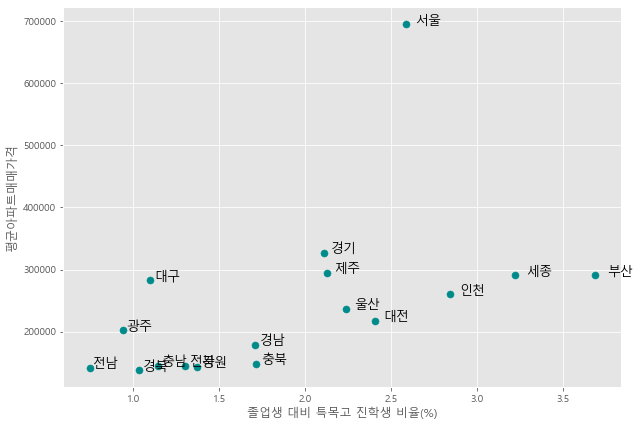

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(gradu_sido['진학률'], gradu_sido['평균매매가격'], color='darkcyan', s=50)
plt.xlabel('졸업생 대비 특목고 진학생 비율(%)')
plt.ylabel('평균아파트매매가격')
for name in gradu_sido.index:
    plt.text(gradu_sido['진학률'][name]*1.02, gradu_sido['평균매매가격'][name], name, fontsize=13)        
plt.show()

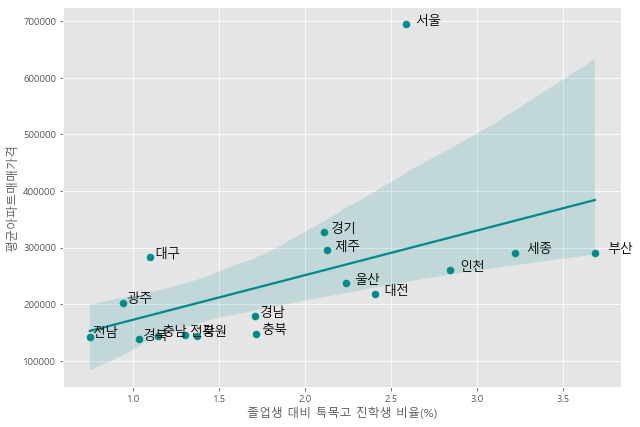

In [38]:
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.scatter(gradu_sido['진학률'], gradu_sido['평균매매가격'], color='darkcyan', s=50)
sns.regplot(gradu_sido['진학률'], gradu_sido['평균매매가격'], scatter=False, color='darkcyan')
plt.xlabel('졸업생 대비 특목고 진학생 비율(%)')
plt.ylabel('평균아파트매매가격')
for name in gradu_sido.index:
    plt.text(gradu_sido['진학률'][name]*1.02, gradu_sido['평균매매가격'][name], name, fontsize=13)
        
plt.show()

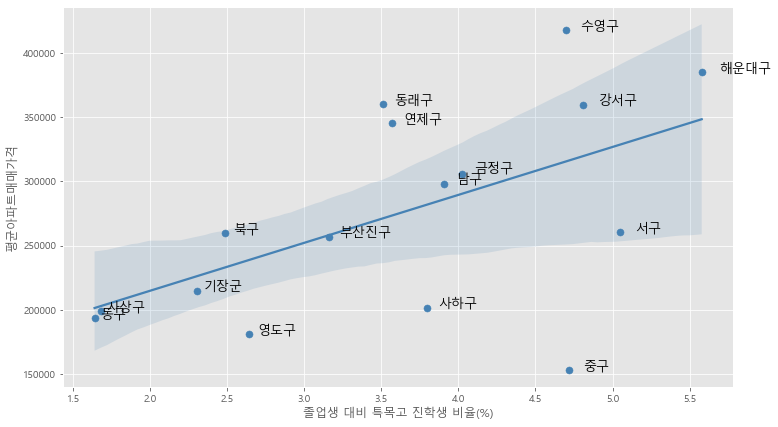

In [39]:
local = '부산'

gradu_gu = gradu_df[gradu_df['시도'] == local].groupby('구군').sum()
gradu_gu['진학률'] = gradu_gu['총합'] / gradu_gu['졸업자'] * 100
gradu_gu['평균매매가격'] = price_data.loc['2018-6-1'][local][gradu_gu.index]
gradu_gu = gradu_gu.dropna()

plt.figure(figsize=(12, 7))
plt.scatter(gradu_gu['진학률'], gradu_gu['평균매매가격'], color='steelblue', s=50)
sns.regplot(gradu_gu['진학률'], gradu_gu['평균매매가격'], scatter=False, color='steelblue')
plt.xlabel('졸업생 대비 특목고 진학생 비율(%)')
plt.ylabel('평균아파트매매가격')
for name in gradu_gu.index:
    plt.text(gradu_gu['진학률'][name]*1.02, gradu_gu['평균매매가격'][name], name, fontsize=13)

In [40]:
gradu_gu

,졸업자,과고,외고,총합,진학률,평균매매가격
구군,,,,,,
강서구,728.0,4.0,31.0,35.0,4.807692,359232
금정구,1890.0,23.0,53.0,76.0,4.021164,306175
기장군,1433.0,5.0,28.0,33.0,2.302861,214956
남구,2456.0,19.0,77.0,96.0,3.908795,298089
동구,610.0,2.0,8.0,10.0,1.639344,193361
동래구,2563.0,30.0,60.0,90.0,3.511510,360443
부산진구,2689.0,20.0,65.0,85.0,3.161026,256955
북구,2492.0,18.0,44.0,62.0,2.487961,259735
사상구,1430.0,7.0,17.0,24.0,1.678322,199006
